# Projecting Age-Specific Population

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ywgg8b8m because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv('~/cpt5/capstone/data/processed/2010, 2015-2025, 2030 age v1.csv')

In [3]:
data['Age'].value_counts()

0-4            17
45-49          17
75-79          17
70-74          17
65-69          17
60-64          17
55-59          17
50-54          17
40-44          17
5-9            17
35-39          17
30-34          17
25-29          17
20-24          17
15-19          17
10-14          17
80 and over    17
Name: Age, dtype: int64

In [4]:
data.Age.unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80 and over'], dtype=object)

In [5]:
data1 = data.melt(id_vars=['Age', 'Region'], 
               value_vars=['2010', '2015', '2016', '2017', '2018', '2019',
                        '2020','2021','2022','2023','2024','2025','2030'])


data1.columns = ['Age', 'Region', 'year', 'population']
data1.head()

,Age,Region,year,population
0,0-4,NATIONAL CAPITAL REGION (NCR),2010,1172000
1,5-9,NATIONAL CAPITAL REGION (NCR),2010,1149400
2,10-14,NATIONAL CAPITAL REGION (NCR),2010,1124700
3,15-19,NATIONAL CAPITAL REGION (NCR),2010,1163400
4,20-24,NATIONAL CAPITAL REGION (NCR),2010,1212000


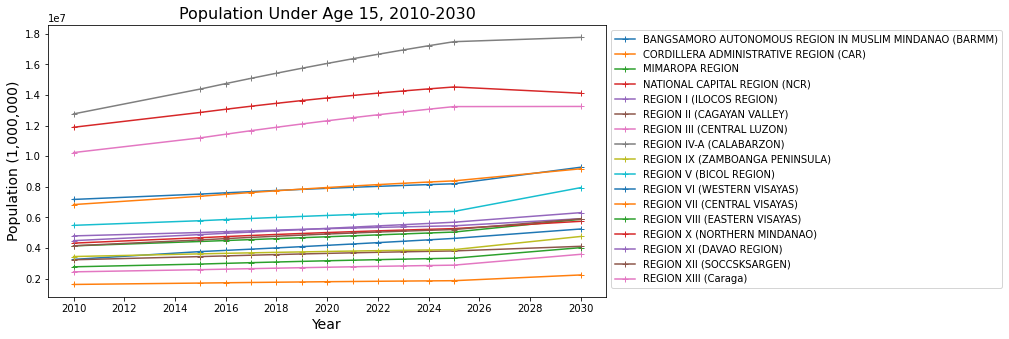

In [6]:
data2 = pd.DataFrame(data1.groupby(['Region', 'year'])
                                    ['population'].sum()).reset_index()
data2['year'] = data2['year'].astype(int)

plt.figure(figsize=(10,5))
for i in data2['Region'].unique():
    df = data2[data2['Region']==i]
    plt.plot(df.year, df.population, '+-', label=i)
plt.xticks(np.arange(2010,2031,2))

plt.title('Population Under Age 15, 2010-2030', fontsize=16)
plt.ylabel('Population (1,000,000)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(bbox_to_anchor=[1,1])

## Interpolate values
**Using pandas linear interpolation for years 2011-2014 & 2026-2029**

In [7]:
df_pivot = data2.pivot(columns=['Region'], values='population',
                                  index='year').reset_index()
df_pivot

Region,year,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM),CORDILLERA ADMINISTRATIVE REGION (CAR),MIMAROPA REGION,NATIONAL CAPITAL REGION (NCR),REGION I (ILOCOS REGION),REGION II (CAGAYAN VALLEY),REGION III (CENTRAL LUZON),REGION IV-A (CALABARZON),REGION IX (ZAMBOANGA PENINSULA),REGION V (BICOL REGION),REGION VI (WESTERN VISAYAS),REGION VII (CENTRAL VISAYAS),REGION VIII (EASTERN VISAYAS),REGION X (NORTHERN MINDANAO),REGION XI (DAVAO REGION),REGION XII (SOCCSKSARGEN),REGION XIII (Caraga)
0,2010,3264100,1629300,2780300,11890800,4798900,3240200,10238300,12762000,3451200,5488300,7179000,6843400,4149100,4327200,4488200,4152900,2451900
1,2015,3774854,1720134,2959491,12859211,5021171,3447468,11199069,14387196,3625830,5790307,7528646,7386344,4434152,4682374,4885808,4537578,2593738
2,2016,3853142,1739380,3006430,13066832,5076184,3493662,11437442,14741686,3660328,5865520,7610389,7511565,4495990,4755673,4967320,4621162,2627491
3,2017,3932991,1757717,3051342,13264805,5128542,3537703,11667642,15085285,3693191,5937321,7688734,7631003,4557614,4825658,5048419,4701027,2660236
4,2018,4014587,1775210,3094357,13453701,5178410,3579715,11890314,15418944,3724550,6005949,7763898,7745017,4619183,4892512,5129342,4777419,2692072
5,2019,4097957,1791881,3135503,13633497,5225800,3619689,12105494,15742673,3754387,6071398,7835883,7853606,4680701,4956259,5210081,4850329,2723012
6,2020,4183316,1807738,3174859,13804656,5270807,3657741,12313718,16057299,3782761,6133836,7904899,7957046,4742337,5017051,5290869,4919936,2753109
7,2021,4270193,1822719,3212211,13966223,5313223,3693664,12513847,16361107,3809540,6192924,7970551,8054772,4803767,5074563,5371254,4985878,2782218
8,2022,4358837,1836857,3247680,14118673,5353139,3727548,12706460,16654975,3834801,6248843,8033041,8147078,4865157,5128964,5451448,5048327,2810426
9,2023,4449234,1850151,3281249,14262006,5390567,3759424,12891548,16938893,3858548,6301591,8092366,8233965,4926495,5180245,5531465,5107296,2837738


In [8]:
df = pd.DataFrame()
df['year'] = np.arange(2010, 2031)
df_new = df.merge(df_pivot, on='year', how='left')
df_new

,year,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM),CORDILLERA ADMINISTRATIVE REGION (CAR),MIMAROPA REGION,NATIONAL CAPITAL REGION (NCR),REGION I (ILOCOS REGION),REGION II (CAGAYAN VALLEY),REGION III (CENTRAL LUZON),REGION IV-A (CALABARZON),REGION IX (ZAMBOANGA PENINSULA),REGION V (BICOL REGION),REGION VI (WESTERN VISAYAS),REGION VII (CENTRAL VISAYAS),REGION VIII (EASTERN VISAYAS),REGION X (NORTHERN MINDANAO),REGION XI (DAVAO REGION),REGION XII (SOCCSKSARGEN),REGION XIII (Caraga)
0,2010,3264100.0,1629300.0,2780300.0,11890800.0,4798900.0,3240200.0,10238300.0,12762000.0,3451200.0,5488300.0,7179000.0,6843400.0,4149100.0,4327200.0,4488200.0,4152900.0,2451900.0
1,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,3774854.0,1720134.0,2959491.0,12859211.0,5021171.0,3447468.0,11199069.0,14387196.0,3625830.0,5790307.0,7528646.0,7386344.0,4434152.0,4682374.0,4885808.0,4537578.0,2593738.0
6,2016,3853142.0,1739380.0,3006430.0,13066832.0,5076184.0,3493662.0,11437442.0,14741686.0,3660328.0,5865520.0,7610389.0,7511565.0,4495990.0,4755673.0,4967320.0,4621162.0,2627491.0
7,2017,3932991.0,1757717.0,3051342.0,13264805.0,5128542.0,3537703.0,11667642.0,15085285.0,3693191.0,5937321.0,7688734.0,7631003.0,4557614.0,4825658.0,5048419.0,4701027.0,2660236.0
8,2018,4014587.0,1775210.0,3094357.0,13453701.0,5178410.0,3579715.0,11890314.0,15418944.0,3724550.0,6005949.0,7763898.0,7745017.0,4619183.0,4892512.0,5129342.0,4777419.0,2692072.0
9,2019,4097957.0,1791881.0,3135503.0,13633497.0,5225800.0,3619689.0,12105494.0,15742673.0,3754387.0,6071398.0,7835883.0,7853606.0,4680701.0,4956259.0,5210081.0,4850329.0,2723012.0


In [9]:
regions = ['BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)',
           'CORDILLERA ADMINISTRATIVE REGION (CAR)', 'MIMAROPA REGION',
           'NATIONAL CAPITAL REGION (NCR)', 'REGION I (ILOCOS REGION)',
           'REGION II (CAGAYAN VALLEY)', 'REGION III (CENTRAL LUZON)',
           'REGION IV-A (CALABARZON)', 'REGION IX (ZAMBOANGA PENINSULA)',
           'REGION V (BICOL REGION)', 'REGION VI (WESTERN VISAYAS)',
           'REGION VII (CENTRAL VISAYAS)', 'REGION VIII (EASTERN VISAYAS)',
           'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
           'REGION XII (SOCCSKSARGEN)', 'REGION XIII (Caraga)']

for region in regions:
    df_new[region] = df_new[region].interpolate(kind='linear')

In [10]:
df_new

,year,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM),CORDILLERA ADMINISTRATIVE REGION (CAR),MIMAROPA REGION,NATIONAL CAPITAL REGION (NCR),REGION I (ILOCOS REGION),REGION II (CAGAYAN VALLEY),REGION III (CENTRAL LUZON),REGION IV-A (CALABARZON),REGION IX (ZAMBOANGA PENINSULA),REGION V (BICOL REGION),REGION VI (WESTERN VISAYAS),REGION VII (CENTRAL VISAYAS),REGION VIII (EASTERN VISAYAS),REGION X (NORTHERN MINDANAO),REGION XI (DAVAO REGION),REGION XII (SOCCSKSARGEN),REGION XIII (Caraga)
0,2010,3264100.0,1629300.0,2780300.0,11890800.0,4798900.0,3240200.0,10238300.0,12762000.0,3451200.0,5488300.0,7179000.0,6843400.0,4149100.0,4327200.0,4488200.0,4152900.0,2451900.0
1,2011,3366250.8,1647466.8,2816138.2,12084482.2,4843354.2,3281653.6,10430453.8,13087039.2,3486126.0,5548701.4,7248929.2,6951988.8,4206110.4,4398234.8,4567721.6,4229835.6,2480267.6
2,2012,3468401.6,1665633.6,2851976.4,12278164.4,4887808.4,3323107.2,10622607.6,13412078.4,3521052.0,5609102.8,7318858.4,7060577.6,4263120.8,4469269.6,4647243.2,4306771.2,2508635.2
3,2013,3570552.4,1683800.4,2887814.6,12471846.6,4932262.6,3364560.8,10814761.4,13737117.6,3555978.0,5669504.2,7388787.6,7169166.4,4320131.2,4540304.4,4726764.8,4383706.8,2537002.8
4,2014,3672703.2,1701967.2,2923652.8,12665528.8,4976716.8,3406014.4,11006915.2,14062156.8,3590904.0,5729905.6,7458716.8,7277755.2,4377141.6,4611339.2,4806286.4,4460642.4,2565370.4
5,2015,3774854.0,1720134.0,2959491.0,12859211.0,5021171.0,3447468.0,11199069.0,14387196.0,3625830.0,5790307.0,7528646.0,7386344.0,4434152.0,4682374.0,4885808.0,4537578.0,2593738.0
6,2016,3853142.0,1739380.0,3006430.0,13066832.0,5076184.0,3493662.0,11437442.0,14741686.0,3660328.0,5865520.0,7610389.0,7511565.0,4495990.0,4755673.0,4967320.0,4621162.0,2627491.0
7,2017,3932991.0,1757717.0,3051342.0,13264805.0,5128542.0,3537703.0,11667642.0,15085285.0,3693191.0,5937321.0,7688734.0,7631003.0,4557614.0,4825658.0,5048419.0,4701027.0,2660236.0
8,2018,4014587.0,1775210.0,3094357.0,13453701.0,5178410.0,3579715.0,11890314.0,15418944.0,3724550.0,6005949.0,7763898.0,7745017.0,4619183.0,4892512.0,5129342.0,4777419.0,2692072.0
9,2019,4097957.0,1791881.0,3135503.0,13633497.0,5225800.0,3619689.0,12105494.0,15742673.0,3754387.0,6071398.0,7835883.0,7853606.0,4680701.0,4956259.0,5210081.0,4850329.0,2723012.0


In [11]:
df_new.columns

Index(['year', 'BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)',
       'CORDILLERA ADMINISTRATIVE REGION (CAR)', 'MIMAROPA REGION',
       'NATIONAL CAPITAL REGION (NCR)', 'REGION I (ILOCOS REGION)',
       'REGION II (CAGAYAN VALLEY)', 'REGION III (CENTRAL LUZON)',
       'REGION IV-A (CALABARZON)', 'REGION IX (ZAMBOANGA PENINSULA)',
       'REGION V (BICOL REGION)', 'REGION VI (WESTERN VISAYAS)',
       'REGION VII (CENTRAL VISAYAS)', 'REGION VIII (EASTERN VISAYAS)',
       'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
       'REGION XII (SOCCSKSARGEN)', 'REGION XIII (Caraga)'],
      dtype='object')

In [12]:
cols = ["year", "BARMM", "CAR", "MIMAROPA", "NCR",
          "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon", "IX - Zamboanga",
          "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga"]

In [13]:
df_new.columns = cols

In [14]:
labels = ["NCR", "CAR", "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "MIMAROPA", "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "IX - Zamboanga",
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "BARMM"]

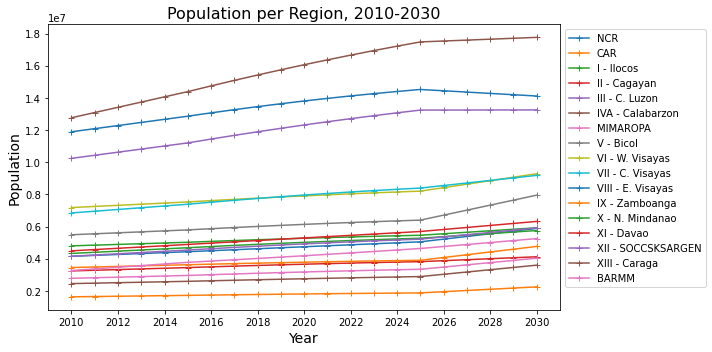

In [15]:
plt.figure(figsize=(10,5))
for i in labels:
    plt.plot(df_new.year, df_new[i],
             '+-', label=i)
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(np.arange(2010,2031,2))
plt.title('Population per Region, 2010-2030', fontsize=16);
plt.ylabel('Population', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
# plt.savefig('regional_population.png', dpi=300);

In [16]:
total_population = df_new.melt(id_vars='year', value_vars=cols[1:])
total_population.columns = ['year', 'Region', 'total_population']
total_population.head()

,year,Region,total_population
0,2010,BARMM,3264100.0
1,2011,BARMM,3366250.8
2,2012,BARMM,3468401.6
3,2013,BARMM,3570552.4
4,2014,BARMM,3672703.2


## Forecast Age-specific population

In [17]:
age_under15 = data[data['Age'].isin(['0-4', '5-9', '10-14'])]
age_under15.head()

,Age,Region,2010,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2030
0,0-4,NATIONAL CAPITAL REGION (NCR),1172000,1198759,1201229,1202324,1202085,1200545,1197730,1193687,1188444,1182035,1174471,1165827,1000300
1,5-9,NATIONAL CAPITAL REGION (NCR),1149400,1162085,1175471,1187814,1199163,1209531,1218955,1227397,1234894,1241461,1247125,1251864,1055900
2,10-14,NATIONAL CAPITAL REGION (NCR),1124700,1133995,1155495,1176201,1196166,1215387,1233908,1251623,1268580,1284774,1300241,1314895,1144800
17,0-4,CORDILLERA ADMINISTRATIVE REGION (CAR),178100,179236,180024,180693,181250,181697,182034,182265,182386,182401,182314,182125,195700
18,5-9,CORDILLERA ADMINISTRATIVE REGION (CAR),174500,180608,180905,181073,181118,181042,180841,180526,180100,179561,178910,178158,195800


## Get population of the under age 15 yrs

In [18]:
age_under15 = data[data['Age'].isin(['0-4', '5-9', '10-14'])]
age_under15.head()

,Age,Region,2010,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2030
0,0-4,NATIONAL CAPITAL REGION (NCR),1172000,1198759,1201229,1202324,1202085,1200545,1197730,1193687,1188444,1182035,1174471,1165827,1000300
1,5-9,NATIONAL CAPITAL REGION (NCR),1149400,1162085,1175471,1187814,1199163,1209531,1218955,1227397,1234894,1241461,1247125,1251864,1055900
2,10-14,NATIONAL CAPITAL REGION (NCR),1124700,1133995,1155495,1176201,1196166,1215387,1233908,1251623,1268580,1284774,1300241,1314895,1144800
17,0-4,CORDILLERA ADMINISTRATIVE REGION (CAR),178100,179236,180024,180693,181250,181697,182034,182265,182386,182401,182314,182125,195700
18,5-9,CORDILLERA ADMINISTRATIVE REGION (CAR),174500,180608,180905,181073,181118,181042,180841,180526,180100,179561,178910,178158,195800


In [19]:
age_under15.groupby('Region')['Age'].unique()

Region
BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)    [0-4, 5-9, 10-14]
CORDILLERA ADMINISTRATIVE REGION (CAR)                     [0-4, 5-9, 10-14]
MIMAROPA REGION                                            [0-4, 5-9, 10-14]
NATIONAL CAPITAL REGION (NCR)                              [0-4, 5-9, 10-14]
REGION I (ILOCOS REGION)                                   [0-4, 5-9, 10-14]
REGION II (CAGAYAN VALLEY)                                 [0-4, 5-9, 10-14]
REGION III (CENTRAL LUZON)                                 [0-4, 5-9, 10-14]
REGION IV-A (CALABARZON)                                   [0-4, 5-9, 10-14]
REGION IX (ZAMBOANGA PENINSULA)                            [0-4, 5-9, 10-14]
REGION V (BICOL REGION)                                    [0-4, 5-9, 10-14]
REGION VI (WESTERN VISAYAS)                                [0-4, 5-9, 10-14]
REGION VII (CENTRAL VISAYAS)                               [0-4, 5-9, 10-14]
REGION VIII (EASTERN VISAYAS)                              [0-4, 5-9,

In [20]:
df_under15 = age_under15.melt(id_vars=['Age', 'Region'], 
               value_vars=['2010', '2015', '2016', '2017', '2018', '2019',
                        '2020','2021','2022','2023','2024','2025','2030'])

In [21]:
df_under15.head()

,Age,Region,variable,value
0,0-4,NATIONAL CAPITAL REGION (NCR),2010,1172000
1,5-9,NATIONAL CAPITAL REGION (NCR),2010,1149400
2,10-14,NATIONAL CAPITAL REGION (NCR),2010,1124700
3,0-4,CORDILLERA ADMINISTRATIVE REGION (CAR),2010,178100
4,5-9,CORDILLERA ADMINISTRATIVE REGION (CAR),2010,174500


In [22]:
df_under15.columns = ['Age', 'Region', 'year', 'population']
df_under15.head()

,Age,Region,year,population
0,0-4,NATIONAL CAPITAL REGION (NCR),2010,1172000
1,5-9,NATIONAL CAPITAL REGION (NCR),2010,1149400
2,10-14,NATIONAL CAPITAL REGION (NCR),2010,1124700
3,0-4,CORDILLERA ADMINISTRATIVE REGION (CAR),2010,178100
4,5-9,CORDILLERA ADMINISTRATIVE REGION (CAR),2010,174500


In [23]:
df_under15_total = pd.DataFrame(df_under15.groupby(['Region', 'year'])
                                    ['population'].sum()).reset_index()
df_under15_total.head()

,Region,year,population
0,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANA...,2010,1386400
1,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANA...,2015,1588260
2,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANA...,2016,1601834
3,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANA...,2017,1615286
4,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANA...,2018,1628624


In [24]:
df_under15_total['year'] = df_under15_total['year'].astype(int)

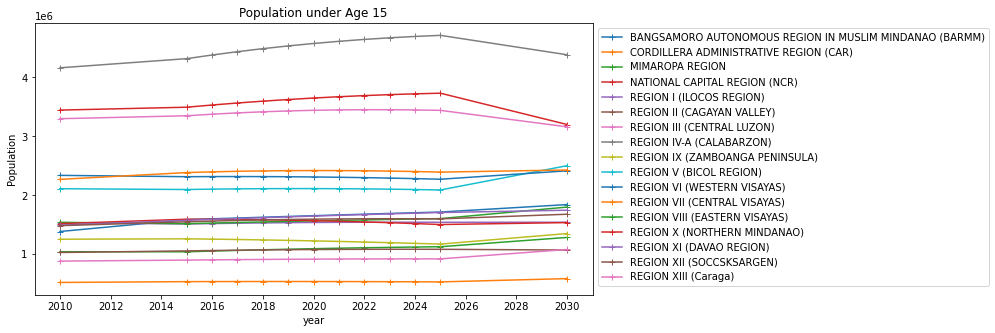

In [25]:
plt.figure(figsize=(10,5))
for i in df_under15_total['Region'].unique():
    df = df_under15_total[df_under15_total['Region']==i]
    plt.plot(df.year, df.population, '+-', label=i)
plt.xticks(np.arange(2010,2031,2))
plt.ylabel('Population')
plt.xlabel('year')
plt.title('Population under Age 15')
plt.legend(bbox_to_anchor=[1,1])

In [26]:
df_pivot = df_under15_total.pivot(columns=['Region'], values='population',
                                  index='year').reset_index()
df_pivot

Region,year,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM),CORDILLERA ADMINISTRATIVE REGION (CAR),MIMAROPA REGION,NATIONAL CAPITAL REGION (NCR),REGION I (ILOCOS REGION),REGION II (CAGAYAN VALLEY),REGION III (CENTRAL LUZON),REGION IV-A (CALABARZON),REGION IX (ZAMBOANGA PENINSULA),REGION V (BICOL REGION),REGION VI (WESTERN VISAYAS),REGION VII (CENTRAL VISAYAS),REGION VIII (EASTERN VISAYAS),REGION X (NORTHERN MINDANAO),REGION XI (DAVAO REGION),REGION XII (SOCCSKSARGEN),REGION XIII (Caraga)
0,2010,1386400,522500,1043900,3446100,1537000,1030500,3300000,4163100,1255700,2112300,2338900,2271200,1542000,1519600,1495800,1485700,884700
1,2015,1588260,536044,1042444,3494839,1513779,1057662,3349788,4318833,1262497,2098911,2316153,2386199,1519567,1595269,1576536,1551262,901382
2,2016,1601834,537193,1054613,3532195,1520888,1063950,3376386,4380487,1257162,2105341,2318200,2398363,1529688,1593971,1591751,1563765,905717
3,2017,1615286,537964,1065941,3566339,1527004,1069389,3398811,4436835,1250979,2110064,2318753,2407804,1539441,1590823,1606478,1574463,909527
4,2018,1628624,538373,1076465,3597414,1532172,1074003,3417226,4488132,1243961,2113133,2317858,2414625,1548861,1585863,1620766,1583430,912831
5,2019,1641828,538426,1086202,3625463,1536404,1077810,3431729,4534479,1236131,2114585,2315541,2418883,1557941,1579157,1634609,1590701,915641
6,2020,1654901,538122,1095173,3650593,1539721,1080830,3442430,4576066,1227482,2114448,2311821,2420648,1566707,1570724,1648060,1596329,917969
7,2021,1667746,537480,1103347,3672707,1542120,1083062,3449357,4612766,1218090,2112762,2306753,2419971,1575117,1560668,1661033,1600324,919811
8,2022,1680381,536504,1110751,3691918,1543627,1084529,3452639,4644788,1207950,2109565,2300349,2416920,1583191,1549023,1673568,1602729,921183
9,2023,1692772,535196,1117400,3708270,1544257,1085251,3452358,4672222,1197088,2104892,2292646,2411561,1590933,1535836,1685671,1603588,922092


In [27]:
df = pd.DataFrame()
df['year'] = np.arange(2010, 2031)
df_under15 = df.merge(df_pivot, on='year', how='left')
df_under15

,year,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM),CORDILLERA ADMINISTRATIVE REGION (CAR),MIMAROPA REGION,NATIONAL CAPITAL REGION (NCR),REGION I (ILOCOS REGION),REGION II (CAGAYAN VALLEY),REGION III (CENTRAL LUZON),REGION IV-A (CALABARZON),REGION IX (ZAMBOANGA PENINSULA),REGION V (BICOL REGION),REGION VI (WESTERN VISAYAS),REGION VII (CENTRAL VISAYAS),REGION VIII (EASTERN VISAYAS),REGION X (NORTHERN MINDANAO),REGION XI (DAVAO REGION),REGION XII (SOCCSKSARGEN),REGION XIII (Caraga)
0,2010,1386400.0,522500.0,1043900.0,3446100.0,1537000.0,1030500.0,3300000.0,4163100.0,1255700.0,2112300.0,2338900.0,2271200.0,1542000.0,1519600.0,1495800.0,1485700.0,884700.0
1,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1588260.0,536044.0,1042444.0,3494839.0,1513779.0,1057662.0,3349788.0,4318833.0,1262497.0,2098911.0,2316153.0,2386199.0,1519567.0,1595269.0,1576536.0,1551262.0,901382.0
6,2016,1601834.0,537193.0,1054613.0,3532195.0,1520888.0,1063950.0,3376386.0,4380487.0,1257162.0,2105341.0,2318200.0,2398363.0,1529688.0,1593971.0,1591751.0,1563765.0,905717.0
7,2017,1615286.0,537964.0,1065941.0,3566339.0,1527004.0,1069389.0,3398811.0,4436835.0,1250979.0,2110064.0,2318753.0,2407804.0,1539441.0,1590823.0,1606478.0,1574463.0,909527.0
8,2018,1628624.0,538373.0,1076465.0,3597414.0,1532172.0,1074003.0,3417226.0,4488132.0,1243961.0,2113133.0,2317858.0,2414625.0,1548861.0,1585863.0,1620766.0,1583430.0,912831.0
9,2019,1641828.0,538426.0,1086202.0,3625463.0,1536404.0,1077810.0,3431729.0,4534479.0,1236131.0,2114585.0,2315541.0,2418883.0,1557941.0,1579157.0,1634609.0,1590701.0,915641.0


In [28]:
cols = ["year", "BARMM", "CAR", "MIMAROPA", "NCR",
          "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon", "IX - Zamboanga",
          "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga"]
df_under15.columns = cols

In [29]:
for region in cols[1:]:
    df_under15[region] = df_under15[region].interpolate(kind='linear')

In [30]:
df1 = df_under15.melt(id_vars='year', value_vars=cols[1:])
df1.columns = ['year', 'Region', 'under15_population']
df1.head()

,year,Region,under15_population
0,2010,BARMM,1386400.0
1,2011,BARMM,1426772.0
2,2012,BARMM,1467144.0
3,2013,BARMM,1507516.0
4,2014,BARMM,1547888.0


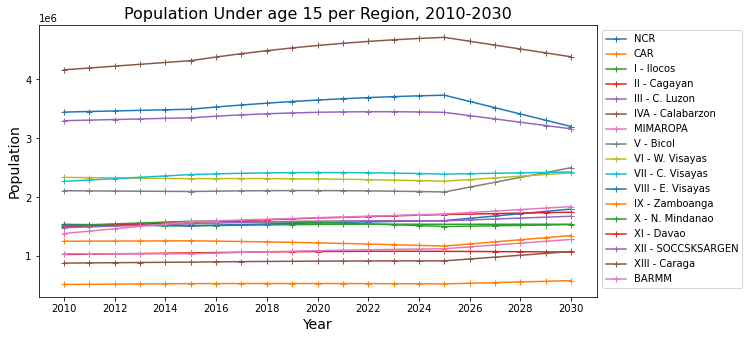

In [31]:
plt.figure(figsize=(10,5))
for i in labels:
    df = df1[df1['Region']==i]
    plt.plot(df.year, df.under15_population, '+-', label=i)

plt.xticks(np.arange(2010,2031,2))
plt.title('Population Under age 15 per Region, 2010-2030', fontsize=16);
plt.ylabel('Population', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(bbox_to_anchor=[1,1])

## Get population of people over 60 yrs old

In [32]:
data['Age'].value_counts()

0-4            17
45-49          17
75-79          17
70-74          17
65-69          17
60-64          17
55-59          17
50-54          17
40-44          17
5-9            17
35-39          17
30-34          17
25-29          17
20-24          17
15-19          17
10-14          17
80 and over    17
Name: Age, dtype: int64

In [33]:
age_over60 = data[data['Age'].isin(['60-64', '65-69', '70-74',
                                     '75-79','80 and over'])]

df_over60 = age_over60.melt(id_vars=['Age', 'Region'], 
               value_vars=['2010', '2015', '2016', '2017', '2018', '2019',
                        '2020','2021','2022','2023','2024','2025','2030'])

df_over60.columns = ['Age', 'Region', 'year', 'population']
df_over60.head()

,Age,Region,year,population
0,60-64,NATIONAL CAPITAL REGION (NCR),2010,282000
1,65-69,NATIONAL CAPITAL REGION (NCR),2010,156200
2,70-74,NATIONAL CAPITAL REGION (NCR),2010,114400
3,75-79,NATIONAL CAPITAL REGION (NCR),2010,69500
4,80 and over,NATIONAL CAPITAL REGION (NCR),2010,62800


In [34]:
df_over60_total = pd.DataFrame(df_over60.groupby(['Region', 'year'])
                                    ['population'].sum()).reset_index()

df_over60_total['year'] = df_over60_total['year'].astype(int)
df_pivot = df_over60_total.pivot(columns=['Region'], values='population',
                                  index='year').reset_index()
df = pd.DataFrame()
df['year'] = np.arange(2010, 2031)
df_over60 = df.merge(df_pivot, on='year', how='left')
df_over60

,year,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM),CORDILLERA ADMINISTRATIVE REGION (CAR),MIMAROPA REGION,NATIONAL CAPITAL REGION (NCR),REGION I (ILOCOS REGION),REGION II (CAGAYAN VALLEY),REGION III (CENTRAL LUZON),REGION IV-A (CALABARZON),REGION IX (ZAMBOANGA PENINSULA),REGION V (BICOL REGION),REGION VI (WESTERN VISAYAS),REGION VII (CENTRAL VISAYAS),REGION VIII (EASTERN VISAYAS),REGION X (NORTHERN MINDANAO),REGION XI (DAVAO REGION),REGION XII (SOCCSKSARGEN),REGION XIII (Caraga)
0,2010,94000.0,111700.0,181900.0,684900.0,425900.0,234800.0,711200.0,781500.0,210800.0,401500.0,616600.0,532600.0,338000.0,269200.0,280700.0,217700.0,168500.0
1,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,111954.0,132952.0,216882.0,849997.0,492701.0,283345.0,877926.0,1005238.0,254254.0,457899.0,711553.0,618105.0,383317.0,327508.0,343988.0,271957.0,198417.0
6,2016,123241.0,136753.0,225476.0,920061.0,506909.0,297044.0,929638.0,1072510.0,263892.0,471291.0,733666.0,643798.0,393703.0,345057.0,362171.0,287239.0,204859.0
7,2017,134926.0,140517.0,234048.0,991004.0,520995.0,310777.0,981906.0,1140853.0,273514.0,484545.0,755692.0,669421.0,404181.0,362692.0,380678.0,302614.0,211300.0
8,2018,147034.0,144251.0,242623.0,1062902.0,534979.0,324566.0,1034818.0,1210347.0,283142.0,497712.0,777664.0,695018.0,414779.0,380439.0,399569.0,318102.0,217753.0
9,2019,159589.0,147967.0,251186.0,1135638.0,548864.0,338393.0,1088313.0,1280923.0,292774.0,510768.0,799583.0,720560.0,425500.0,398274.0,418834.0,333680.0,224225.0


In [35]:
cols = ["year", "BARMM", "CAR", "MIMAROPA", "NCR",
          "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon", "IX - Zamboanga",
          "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga"]
df_over60.columns = cols

In [36]:
for region in cols[1:]:
    df_over60[region] = df_over60[region].interpolate(kind='linear')

In [37]:
df2 = df_over60.melt(id_vars='year', value_vars=cols[1:])
df2.columns = ['year', 'Region', 'over60_population']
df2.head()

,year,Region,over60_population
0,2010,BARMM,94000.0
1,2011,BARMM,97590.8
2,2012,BARMM,101181.6
3,2013,BARMM,104772.4
4,2014,BARMM,108363.2


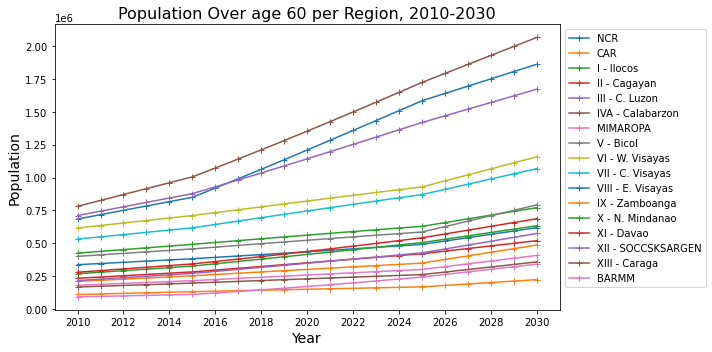

In [38]:
plt.figure(figsize=(10,5))
for i in labels:
    df = df2[df2['Region']==i]
    plt.plot(df.year, df.over60_population, '+-', label=i)

plt.xticks(np.arange(2010,2031,2))
plt.title('Population Over age 60 per Region, 2010-2030', fontsize=16);
plt.ylabel('Population', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(bbox_to_anchor=[1,1])
plt.tight_layout()

## Get percentage of Age specific population

In [39]:
df_all = df1.merge(total_population, on=['year', 'Region'])
df_all = df_all.merge(df2, on=['year', 'Region'])

In [40]:
df_all

,year,Region,under15_population,total_population,over60_population
0,2010,BARMM,1386400.0,3264100.0,94000.0
1,2011,BARMM,1426772.0,3366250.8,97590.8
2,2012,BARMM,1467144.0,3468401.6,101181.6
3,2013,BARMM,1507516.0,3570552.4,104772.4
4,2014,BARMM,1547888.0,3672703.2,108363.2
...,...,...,...,...,...
352,2026,XIII - Caraga,954358.4,3031391.2,282380.8
353,2027,XIII - Caraga,986168.8,3173093.4,301585.6
354,2028,XIII - Caraga,1017979.2,3314795.6,320790.4
355,2029,XIII - Caraga,1049789.6,3456497.8,339995.2


In [41]:
df_all['proportion_under15'] = (df_all['under15_population'] /
                                    df_all['total_population'])
df_all['proportion_over60'] = (df_all['over60_population'] /
                                    df_all['total_population'])

In [42]:
df_all

,year,Region,under15_population,total_population,over60_population,proportion_under15,proportion_over60
0,2010,BARMM,1386400.0,3264100.0,94000.0,0.424742,0.028798
1,2011,BARMM,1426772.0,3366250.8,97590.8,0.423846,0.028991
2,2012,BARMM,1467144.0,3468401.6,101181.6,0.423003,0.029172
3,2013,BARMM,1507516.0,3570552.4,104772.4,0.422208,0.029343
4,2014,BARMM,1547888.0,3672703.2,108363.2,0.421457,0.029505
...,...,...,...,...,...,...,...
352,2026,XIII - Caraga,954358.4,3031391.2,282380.8,0.314825,0.093152
353,2027,XIII - Caraga,986168.8,3173093.4,301585.6,0.310791,0.095045
354,2028,XIII - Caraga,1017979.2,3314795.6,320790.4,0.307102,0.096775
355,2029,XIII - Caraga,1049789.6,3456497.8,339995.2,0.303715,0.098364


In [43]:
labels = ["NCR", "CAR", "I - Ilocos", "II - Cagayan",
          "III - C. Luzon", "IVA - Calabarzon",
          "MIMAROPA", "V - Bicol", "VI - W. Visayas",
          "VII - C. Visayas", "VIII - E. Visayas", 
          "IX - Zamboanga",
          "X - N. Mindanao", "XI - Davao", "XII - SOCCSKSARGEN",
          "XIII - Caraga", "BARMM"]

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'indigo', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'maroon', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']

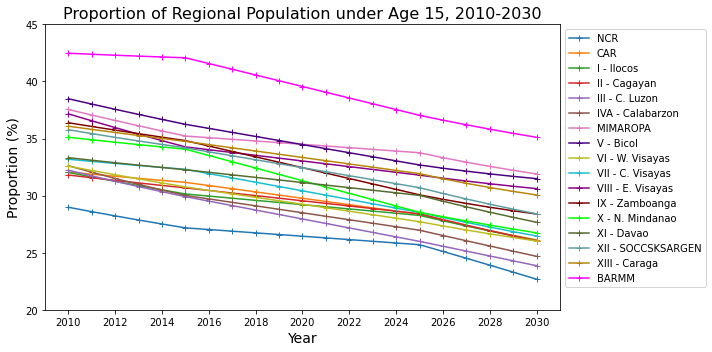

In [44]:
plt.figure(figsize=(10,5))
for i,j in enumerate(labels):
    df = df_all[df_all['Region'] == j]
    plt.plot(df['year'], (df['proportion_under15'])*100,'+-', color=colors[i],
             label=j)
    
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.yticks(np.arange(20, 50, 5))
plt.title('Proportion of Regional Population under Age 15, 2010-2030',
          fontsize=16)
plt.ylabel('Proportion (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('proportion_under15.png', dpi=300);

In [45]:
df_all[df_all['year'] == 2030].sort_values(by='proportion_under15', ascending=True)

,year,Region,under15_population,total_population,over60_population,proportion_under15,proportion_over60
83,2030,NCR,3201000.0,14113400.0,1860600.0,0.226806,0.131832
146,2030,III - C. Luzon,3161800.0,13249300.0,1671500.0,0.238639,0.126158
167,2030,IVA - Calabarzon,4384100.0,17760100.0,2064500.0,0.246851,0.116244
230,2030,VI - W. Visayas,2416000.0,9282600.0,1157700.0,0.260272,0.124717
125,2030,II - Cagayan,1072400.0,4119200.0,520400.0,0.260342,0.126335
104,2030,I - Ilocos,1543900.0,5922600.0,771400.0,0.260679,0.130247
41,2030,CAR,587700.0,2249400.0,224600.0,0.261270,0.099849
251,2030,VII - C. Visayas,2429800.0,9181000.0,1067900.0,0.264655,0.116316
293,2030,X - N. Mindanao,1537600.0,5751100.0,634100.0,0.267358,0.110257
314,2030,XI - Davao,1747700.0,6317000.0,687400.0,0.276666,0.108817


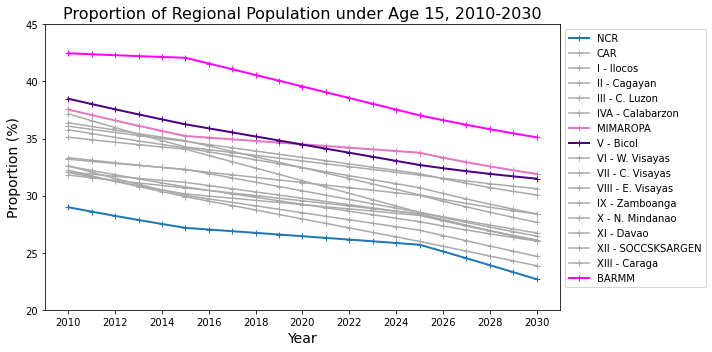

In [46]:
plt.figure(figsize=(10,5))
for i,j in enumerate(labels):
    df = df_all[df_all['Region'] == j]
    if j in ['BARMM', 'MIMAROPA', 'V - Bicol', 'NCR']:
        plt.plot(df['year'], (df['proportion_under15'])*100,'+-', color=colors[i],
                 label=j, lw=2)
    else:
         plt.plot(df['year'], (df['proportion_under15'])*100,'+-', color='darkgrey',
                 label=j)
        
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.yticks(np.arange(20, 50, 5))
plt.title('Proportion of Regional Population under Age 15, 2010-2030',
          fontsize=16)
plt.ylabel('Proportion (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('PPT_proportion_under15.png', dpi=300);

NameError: name 'df_ncr' is not defined

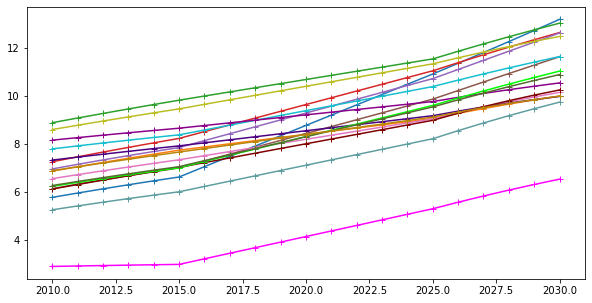

In [47]:
plt.figure(figsize=(10,5))
for i,j in enumerate(labels):
    df = df_all[df_all['Region'] == j]
    plt.plot(df['year'], (df['proportion_over60'])*100,'+-', color=colors[i],
             label=j)
    
plt.plot(df_ncr['year'], (df_ncr['proportion_over60'])*100, '+-',color='tab:blue',
        lw=4)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.yticks(np.arange(0, 25, 5))
plt.title('Proportion of Population Over age 60 per Region, (2010-2030)',
          fontsize=16)
plt.ylabel('Proportion (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('proportion_over60.png', dpi=300);

In [ ]:
plt.figure(figsize=(10,5))
df_ncr = df_all[df_all['Region']=='NCR']

for i,j in enumerate(labels):
    df = df_all[df_all['Region'] == j]
    if j in ['BARMM', 'I - Ilocos', 'NCR']:
        plt.plot(df['year'], (df['proportion_over60'])*100,'+-', color=colors[i],
                 label=j, lw=2)
    else:
         plt.plot(df['year'], (df['proportion_over60'])*100,'+-', color='darkgrey',
                 label=j)
plt.plot(df_ncr['year'], (df_ncr['proportion_over60'])*100, '+-',color='tab:blue',
            label='NCR',lw=2)
        
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.yticks(np.arange(0, 25, 5))
# plt.title('Proportion of Regional Population under Age 15, 2010-2030',
#           fontsize=16)
plt.ylabel('Proportion (%)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('PPT_proportion_overage60.png', dpi=300);

In [48]:
df_all[df_all['year']==2030][['Region','proportion_over60']].sort_values(by='proportion_over60')

,Region,proportion_over60
20,BARMM,0.065213
335,XII - SOCCSKSARGEN,0.097315
209,V - Bicol,0.099702
356,XIII - Caraga,0.099828
41,CAR,0.099849
62,MIMAROPA,0.101391
188,IX - Zamboanga,0.102393
272,VIII - E. Visayas,0.105325
314,XI - Davao,0.108817
293,X - N. Mindanao,0.110257


In [50]:
df_all.to_csv('~/cpt5/capstone/data/processed/age_specific_population.csv')